In [1]:
import pandas as pd
import numpy as np
import os
from importlib import reload

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

from sklearn.model_selection import train_test_split
import skimage
from skimage import io
from skimage.transform import resize

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import time
import os
import copy

# local imports
import model as _model
import utils as _tools

In [2]:
reload(_model)

# build the model (second config)
resnet = _model.TransferModel(use_cpu=False, cfg_path='config2.json')

In [3]:
# load validation results
df = pd.read_csv("results/validation_results.csv")
df.head()

,y_prob,y_pred,y_true
0,0.352248,0,1.0
1,0.259654,0,0.0
2,0.170368,0,0.0
3,0.423573,0,0.0
4,0.178653,0,0.0


In [4]:
df['y_pred'].value_counts()

0    222
1     12
Name: y_pred, dtype: int64

In [5]:
df['y_true'].value_counts()

0.0    166
1.0     68
Name: y_true, dtype: int64

In [12]:
def plot_xray(image, true_label, pred_label):
    """function to plot an xray image """
    
    matplotlib.rcParams['figure.dpi'] = 200
    plt.imshow( np.squeeze(image, axis=0), cmap='viridis_r')
    plt.title(f"Cardiomegaly y_true={true_label}, y_pred={pred_label}")
    plt.axis(False)
    return plt
    
    

<module 'matplotlib.pyplot' from '/sw/arcts/centos7/python3.8-anaconda/2020.07/lib/python3.8/site-packages/matplotlib/pyplot.py'>

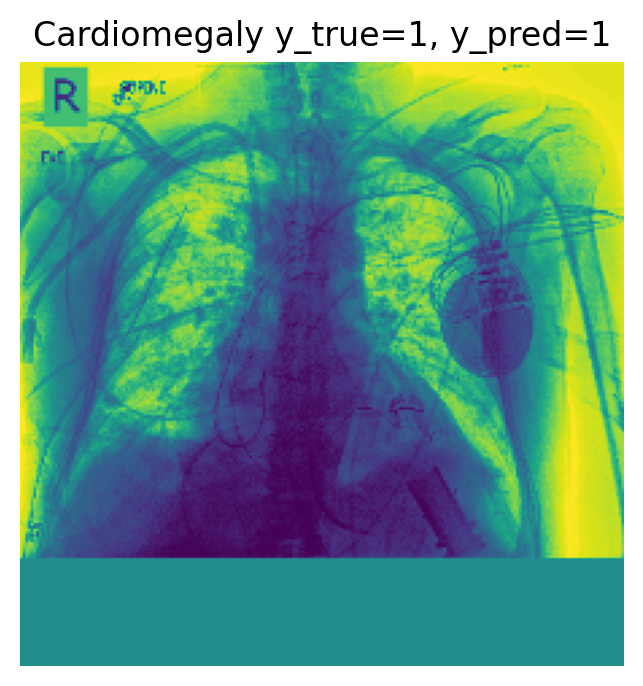

In [14]:
"""
plot a true example
"""
true_label = 1
pred_label = 1


mask = (df['y_true'] == true_label) & (df['y_pred'] == pred_label)

# get image from data
sample = df[mask].sample(1)
idx = sample.index[0]
image, label = resnet.dataloader_valid.dataset[idx]
label = int(label[0]) # cardiomegaly

# plot the image
plot_xray(image, true_label, pred_label)

# outpath = "figures/false_negative.png"
# plt.savefig(outpath, bbox_inches="tight")

In [15]:
valid_df = pd.read_csv("valid.csv")
valid_df.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,CheXpert-v1.0-small/valid/patient64541/study1/...,Male,73,Frontal,AP,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CheXpert-v1.0-small/valid/patient64542/study1/...,Male,70,Frontal,PA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,CheXpert-v1.0-small/valid/patient64542/study1/...,Male,70,Lateral,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,CheXpert-v1.0-small/valid/patient64543/study1/...,Male,85,Frontal,AP,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CheXpert-v1.0-small/valid/patient64544/study1/...,Female,42,Frontal,AP,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
true_label = 1
pred_label = 0


mask = (df['y_true'] == true_label) & (df['y_pred'] == pred_label)
subset = df[mask]

metadata_subset = valid_df[valid_df.index.isin(subset.index)]

metadata_subset['AP/PA'].value_counts()
# metadata_subset


AP    58
PA     1
Name: AP/PA, dtype: int64